In [ ]:
!pip install squarify

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# DATA UNDERSTANDING

## Read Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Louismada29/Human_Capital/main/Dataset_8%20-%20Human%20Capital.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


## Melihat Informasi Awal Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [ ]:
# data shape
df.shape

(54808, 13)

In [ ]:
# data describe
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


tidak ada outlier, hal ini ditunjukkan oleh tidak adanya ketimpangan antara mean dan median

## Menemukan Unique Value dalam setiap kolom

In [ ]:
# menemukan unique value pada kolom 'department'
department = df['department'].unique()
print(department)

['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']


In [ ]:
# menemukan unique value pada kolom 'region'
region = df['region'].unique()
print(region)

['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']


In [ ]:
# menemukan unique value pada kolom 'education'
education = df['education'].unique()
print(education)

["Master's & above" "Bachelor's" nan 'Below Secondary']


In [ ]:
# menemukan unique value pada kolom 'recruitment_channel'
recruitment_channel = df['recruitment_channel'].unique()
print(recruitment_channel)

['sourcing' 'other' 'referred']


# EXPLORATORY DATA ANALYSIS 

In [ ]:
data = df.copy()
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [ ]:
data.loc[data['is_promoted'] == 0, 'is_promoted'] = 'No'
data.loc[data['is_promoted'] == 1, 'is_promoted'] = 'Yes'
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,No
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,No
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,No
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,No
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,No


### Mendefinisikan Variabel Dependen dan Independen

In [ ]:
# Dependent Variable
y = data['is_promoted']
y_no = y[y=='No']
y_yes = y[y=='Yes']

# Independent Variable
X = data.drop('is_promoted', axis = 1)
x_no = data[data['is_promoted']=='No'].drop(['employee_id', 'is_promoted'], axis = 1)
x_yes = data[data['is_promoted']=='Yes'].drop(['employee_id', 'is_promoted'], axis = 1)

##Composition for Each Variable

###Dependent Variable

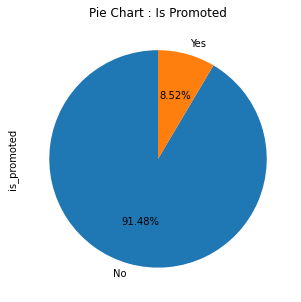

In [ ]:
is_promoted = y.value_counts()
is_promoted.plot.pie(figsize=(5,5), autopct='%1.2F%%', startangle=90)

plt.title('Pie Chart : Is Promoted')
plt.show() 

''' Terlihat data yang tidak seimbang antara kategori Yes dengan kategori No'''
print()

###Independent Variable

#### 1. Department

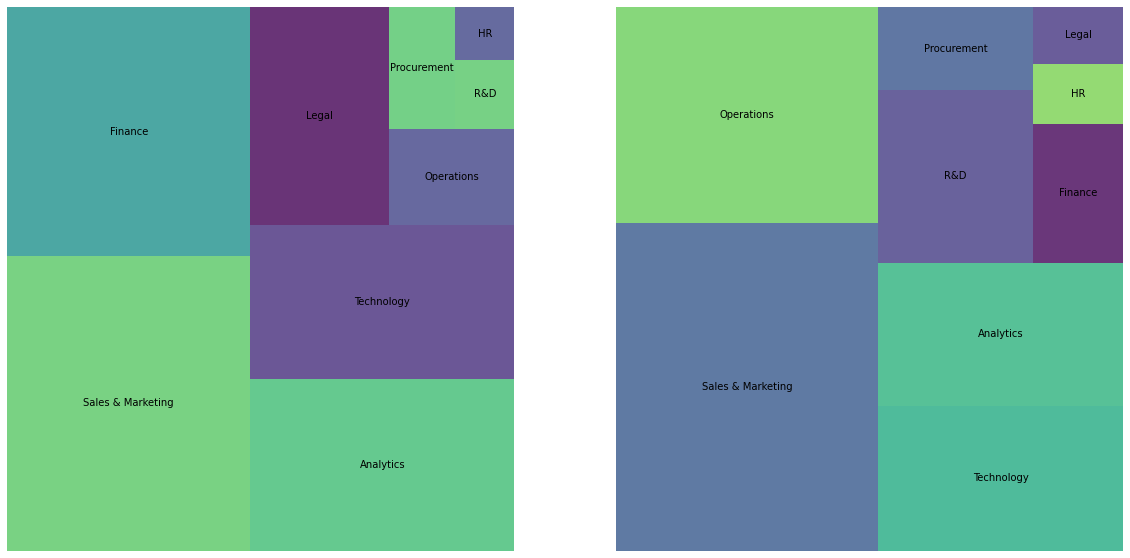

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
department_yes = x_yes['department'].value_counts()
squarify.plot(sizes=department_yes, label=x_yes['department'].unique(), alpha=.8 )
plt.axis('off')

plt.subplot(1, 2, 2)
department_no = x_no['department'].value_counts()
squarify.plot(sizes=department_no, label=x_no['department'].unique(), alpha=.8 )
plt.axis('off')
plt.show()

#### 2. Region

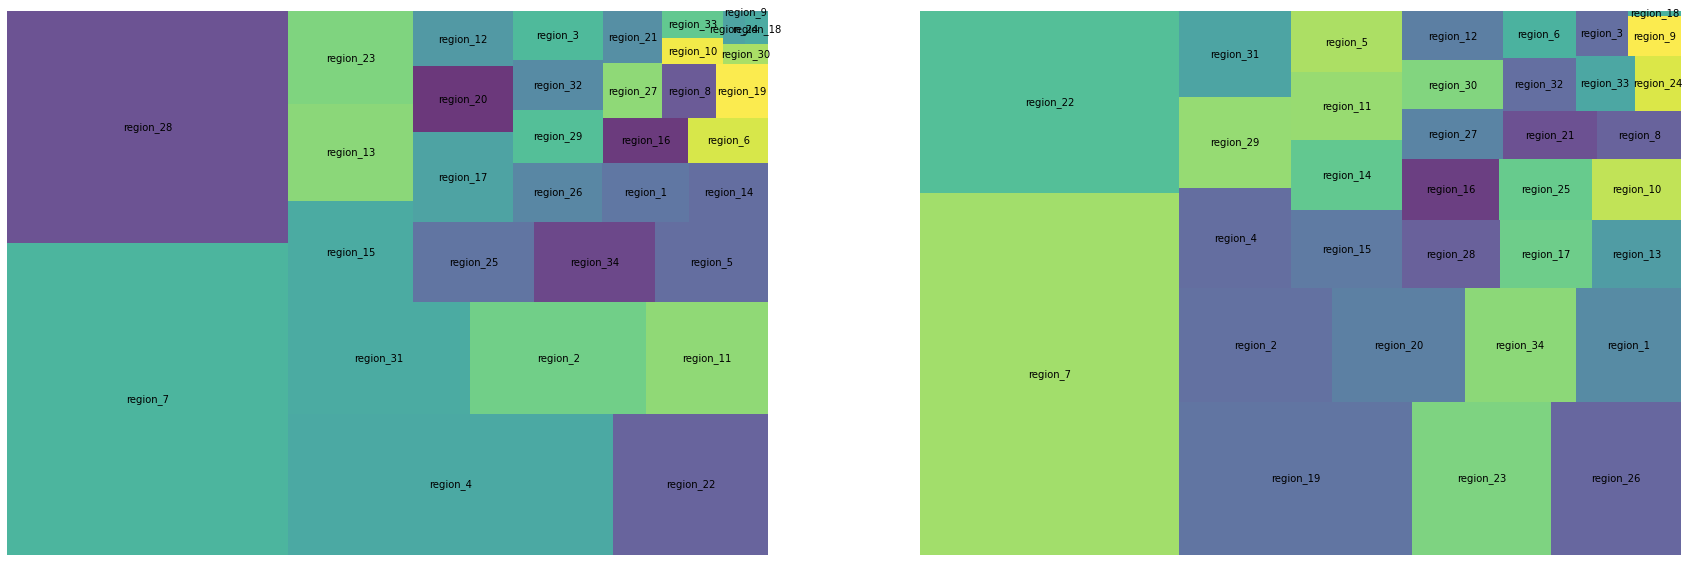

In [ ]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
region_yes = x_yes['region'].value_counts()
squarify.plot(sizes=region_yes, label=x_yes['region'].unique(), alpha=.8 )
plt.axis('off')

plt.subplot(1, 2, 2)
region_no = x_no['region'].value_counts()
squarify.plot(sizes=region_no, label=x_no['region'].unique(), alpha=.8 )
plt.axis('off')
plt.show()

#### 3. Previous Year Rating

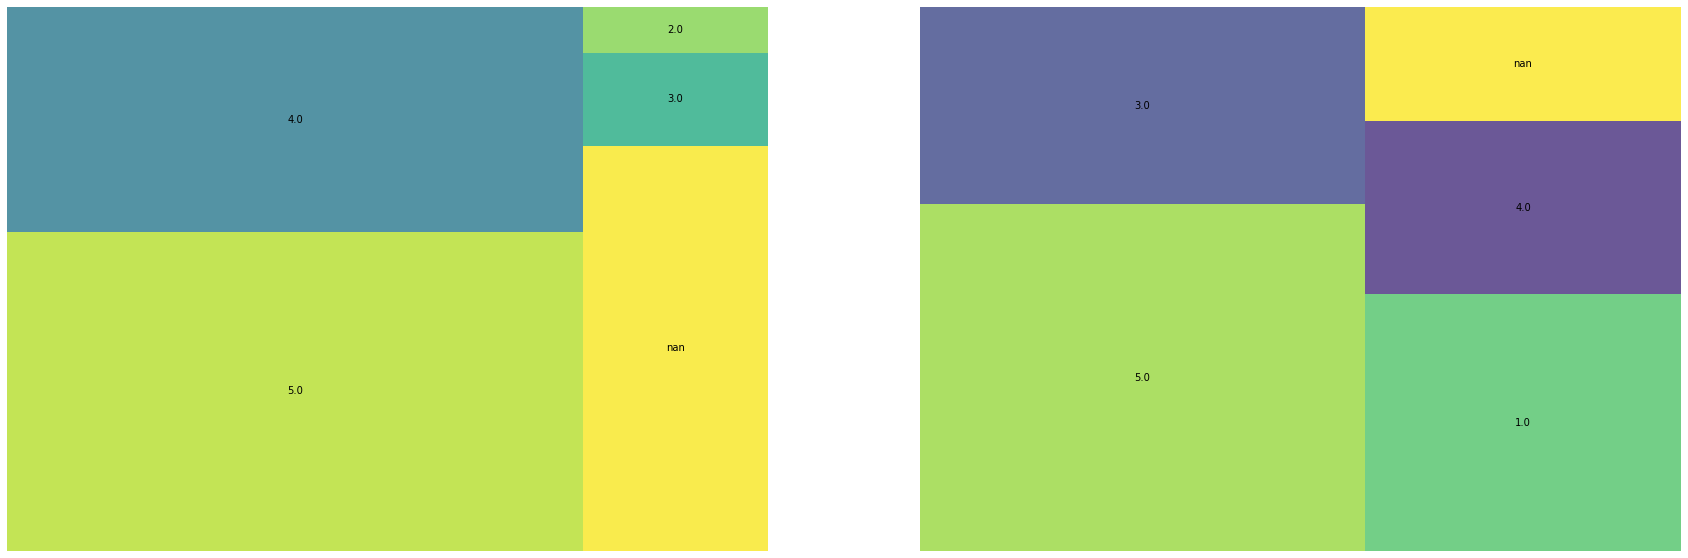

In [ ]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
previous_year_rating_yes = x_yes['previous_year_rating'].value_counts()
squarify.plot(sizes=previous_year_rating_yes, label=x_yes['previous_year_rating'].unique(), alpha=.8 )
plt.axis('off')

plt.subplot(1, 2, 2)
previous_year_rating_no = x_no['previous_year_rating'].value_counts()
squarify.plot(sizes=previous_year_rating_no, label=x_no['previous_year_rating'].unique(), alpha=.8 )
plt.axis('off')
plt.show()


#### 4. Education

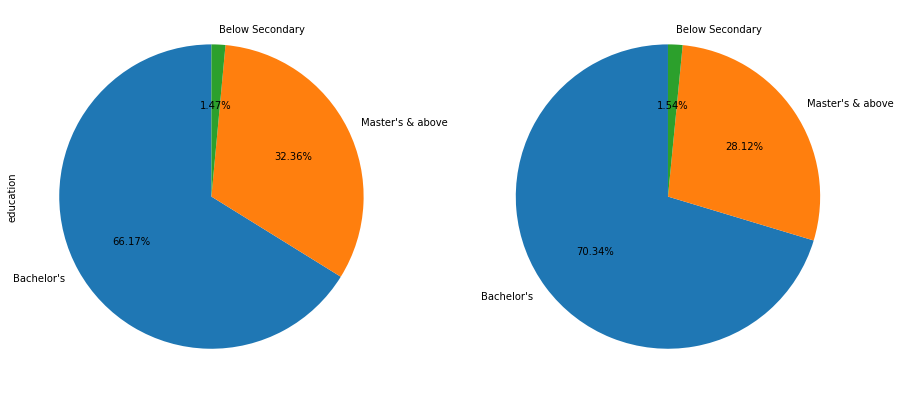

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
education_yes = x_yes['education'].value_counts()
education_yes.plot.pie(autopct='%1.2F%%', startangle=90)

plt.subplot(1, 2, 2)
education_no = x_no['education'].value_counts()
education_no.plot.pie( autopct='%1.2F%%', startangle=90)
plt.axis('off')
plt.show()

#### 5. Gender

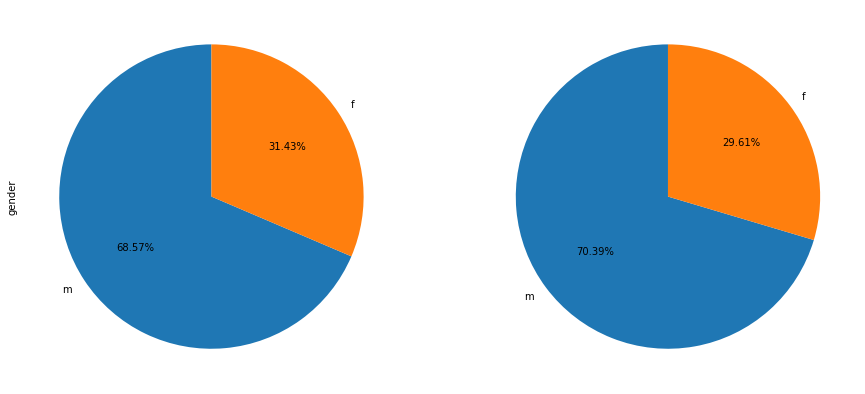

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
gender_yes = x_yes['gender'].value_counts()
gender_yes.plot.pie(autopct='%1.2F%%', startangle=90)

plt.subplot(1, 2, 2)
gender_no = x_no['gender'].value_counts()
gender_no.plot.pie( autopct='%1.2F%%', startangle=90)
plt.axis('off')
plt.show()

#### 6. Recruitment Channel

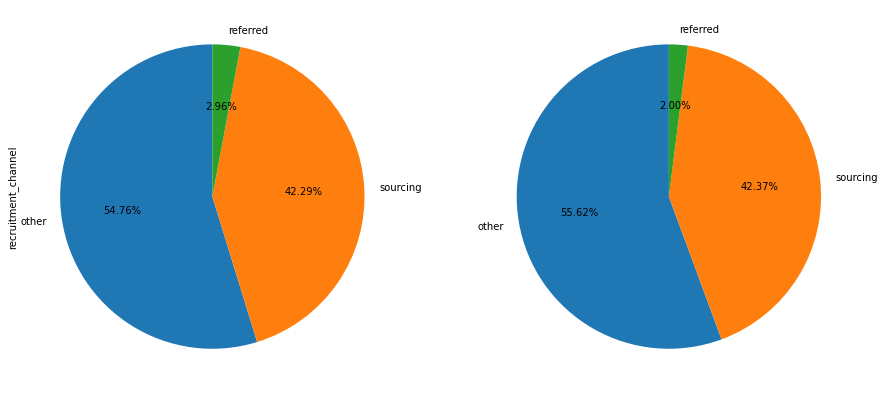

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
recruitment_channel_yes = x_yes['recruitment_channel'].value_counts()
recruitment_channel_yes.plot.pie(autopct='%1.2F%%', startangle=90)

plt.subplot(1, 2, 2)
recruitment_channel_no = x_no['recruitment_channel'].value_counts()
recruitment_channel_no.plot.pie( autopct='%1.2F%%', startangle=90)
plt.axis('off')
plt.show()

#### 7. Awards Won?

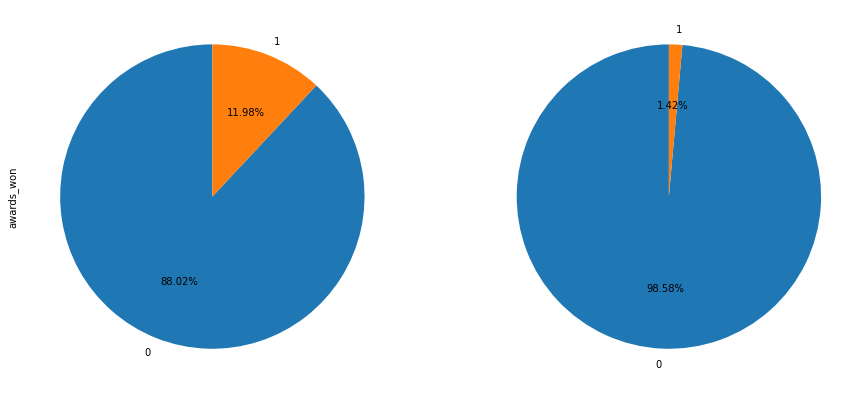

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
awards_yes = x_yes['awards_won'].value_counts()
awards_yes.plot.pie(autopct='%1.2F%%', startangle=90)

plt.subplot(1, 2, 2)
awards_no = x_no['awards_won'].value_counts()
awards_no.plot.pie( autopct='%1.2F%%', startangle=90)
plt.axis('off')
plt.show()

#### 8. Number of Trainings

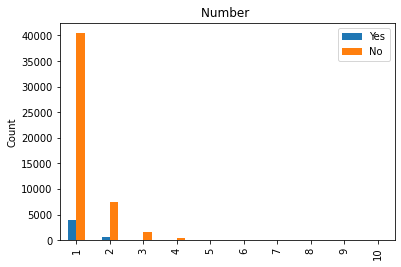

In [ ]:
no_trainings_yes = x_yes['no_of_trainings'].value_counts()
no_trainings_no = x_no['no_of_trainings'].value_counts()

data_new = pd.concat([no_trainings_yes, no_trainings_no],keys=['Yes','No'], axis=1) 

#data_new.plot.bar() #bisa pakai cara 1
data_new.plot(kind='bar') # bisa pakai cara 2


plt.title('Number ')
plt.ylabel('Count')

plt.show() 

#### 9. Age

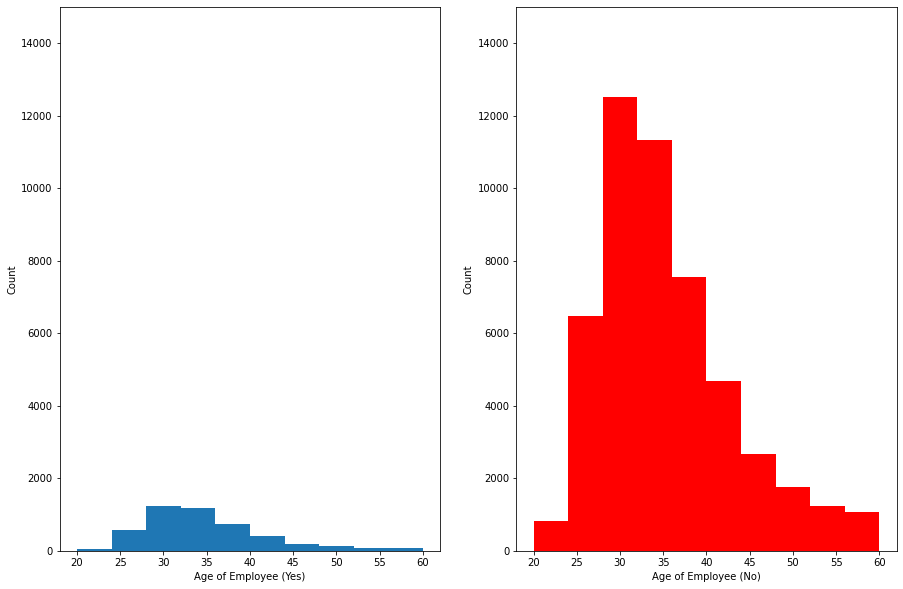

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
x_yes['age'].plot.hist()
plt.ylabel('Count')
plt.xlabel('Age of Employee (Yes)')
plt.ylim([0, 15000])

plt.subplot(1, 2, 2)
x_no['age'].plot.hist(color='r')
plt.ylabel('Count')
plt.xlabel('Age of Employee (No)')
plt.ylim([0, 15000])

plt.show() 

#### 10. Length of Service 

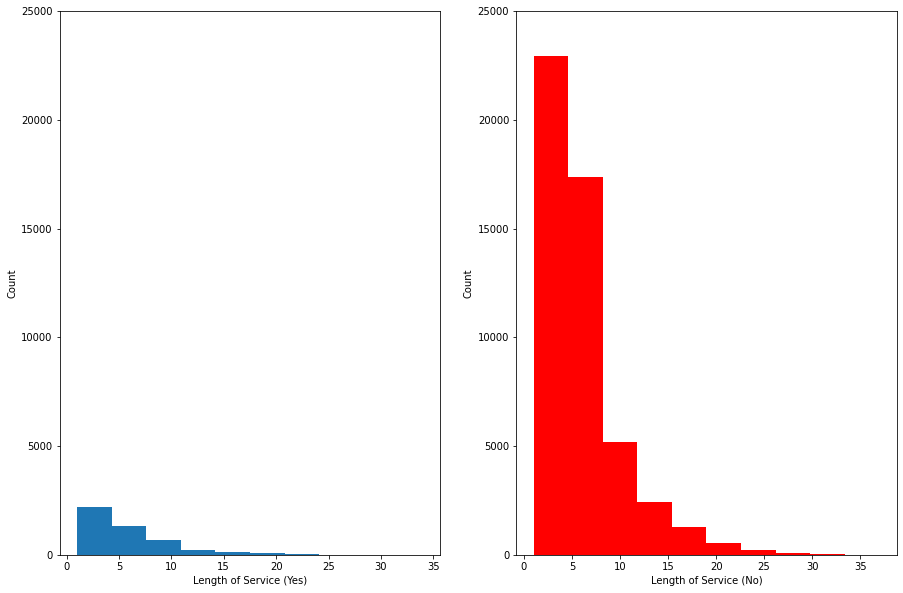

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
x_yes['length_of_service'].plot.hist()
plt.ylabel('Count')
plt.xlabel('Length of Service (Yes)')
plt.ylim([0, 25000])

plt.subplot(1, 2, 2)
x_no['length_of_service'].plot.hist(color='r')
plt.ylabel('Count')
plt.xlabel('Length of Service (No)')
plt.ylim([0, 25000])

plt.show() 

#### 11. Average of Training Score

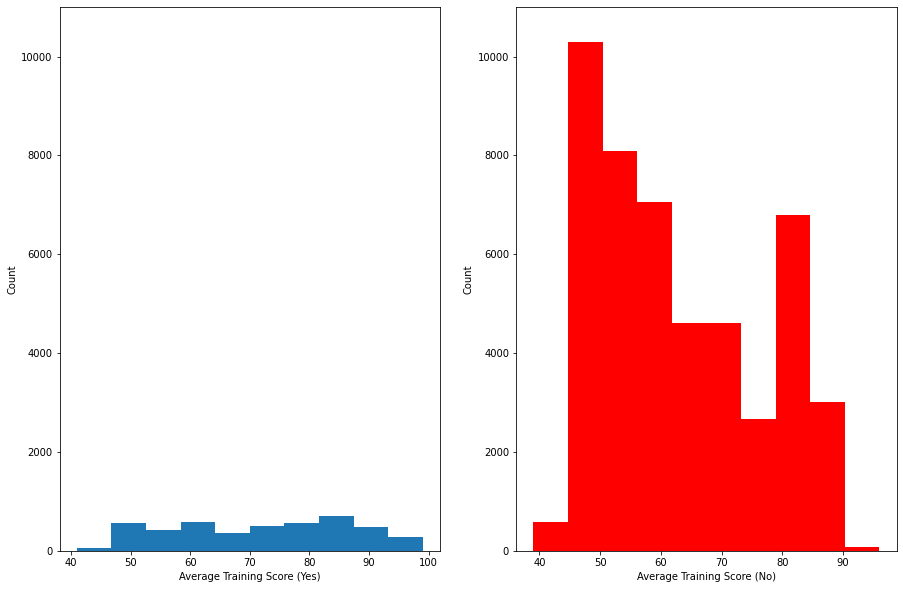

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
x_yes['avg_training_score'].plot.hist()
plt.ylabel('Count')
plt.xlabel('Average Training Score (Yes)')
plt.ylim([0, 11000])

plt.subplot(1, 2, 2)
x_no['avg_training_score'].plot.hist(color='r')
plt.ylabel('Count')
plt.xlabel('Average Training Score (No)')
plt.ylim([0, 11000])

plt.show() 

#### Avg_Training_Score statistics

##### promoted

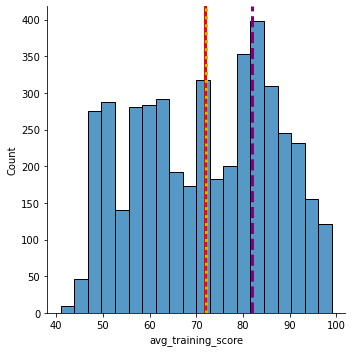

Average :  71.84257403696282
Standard deviation :  14.747916691380128
Median :  72.0
Mode :  82


In [ ]:
# distribution of target variable 'avg_training_score'
sns.displot(data=x_yes, x='avg_training_score')
#sns.displot(data=df_churning, x='age', hue='Attrition_Flag', kde=True)
average = x_yes['avg_training_score'].mean()
median = x_yes['avg_training_score'].median()
mode = x_yes['avg_training_score'].mode()
std = x_yes['avg_training_score'].std()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()
print('Average : ', average)
print('Standard deviation : ', std)
print('Median : ', median)
print('Mode : ', int(mode))

##### not promoted

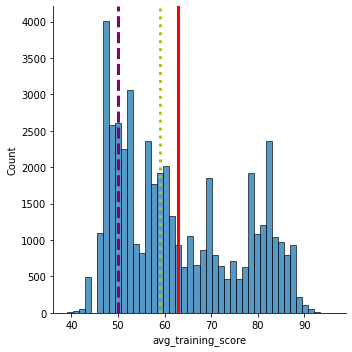

Average :  62.94767259249953
Standard deviation :  13.144823212538888
Median :  59.0
Mode :  50


In [ ]:
# distribution of target variable 'avg_training_score'
sns.displot(data=x_no, x='avg_training_score')
#sns.displot(data=df_churning, x='age', hue='Attrition_Flag', kde=True)
average = x_no['avg_training_score'].mean()
median = x_no['avg_training_score'].median()
mode = x_no['avg_training_score'].mode()
std = x_no['avg_training_score'].std()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()
print('Average : ', average)
print('Standard deviation : ', std)
print('Median : ', median)
print('Mode : ', int(mode))


## Distibution of Various variable

In [ ]:
promoted_data = data[(data.is_promoted == 'Yes')]
notpromoted_data = data[(data.is_promoted == 'No')]

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64


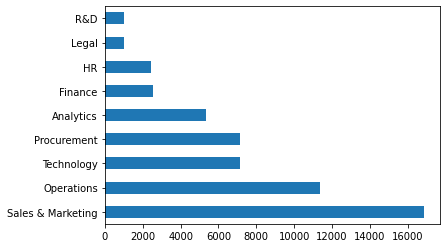

In [ ]:
# distribution of target variable 'department'
print(df['department'].value_counts())
df['department'].value_counts().plot(kind='barh')

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64


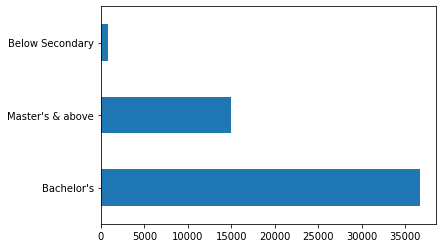

In [ ]:
# distribution of target variable 'education'
print(df['education'].value_counts())
data['education'].value_counts().plot(kind='barh')

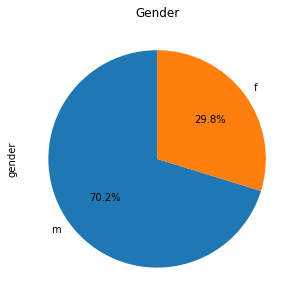

In [ ]:
# distribution of target variable 'gender'
gender = df['gender'].value_counts()
gender.plot.pie(figsize=(5,5), autopct='%1.1f%%', startangle=90)

plt.title('Gender')
plt.show() 

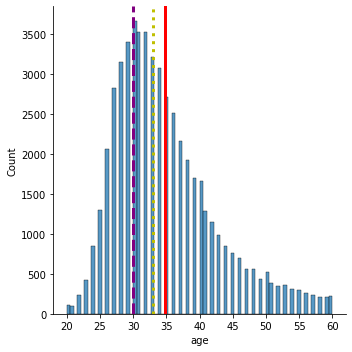

Average :  34.80391548679025
Standard deviation :  7.660169201585887
Median :  33.0
Mode :  30


In [ ]:
# distribution of target variable 'age'
sns.displot(data=df, x='age')
#sns.displot(data=df_churning, x='age', hue='Attrition_Flag', kde=True)
average = df['age'].mean()
median = df['age'].median()
mode = df['age'].mode()
std = df['age'].std()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()
print('Average : ', average)
print('Standard deviation : ', std)
print('Median : ', median)
print('Mode : ', int(mode))

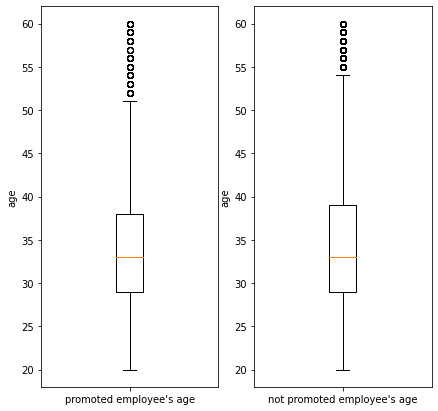

In [ ]:
# Box Plot Variable "age"

plt.figure(figsize=(7, 7))
plt.subplot(1, 2, 1) #2 baris, 2 kolom, plot 1
plt.boxplot(promoted_data['age'])
plt.ylabel('age')
plt.xticks([1],labels=["promoted employee's age"])

plt.subplot(1, 2, 2) #2 baris, 2 kolom, plot 1
plt.boxplot(notpromoted_data['age'])
plt.ylabel('age')
plt.xticks([1],labels=["not promoted employee's age"])

plt.show() 

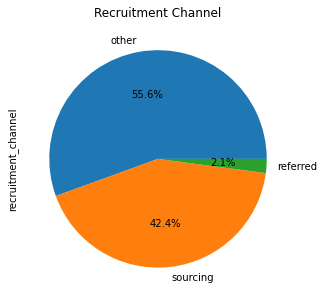

In [ ]:
# distribution of target variable 'recruitment_channel'
recruitment = data['recruitment_channel'].value_counts()
recruitment.plot.pie(figsize=(5,5), autopct='%1.1f%%')

plt.title('Recruitment Channel')
plt.show()

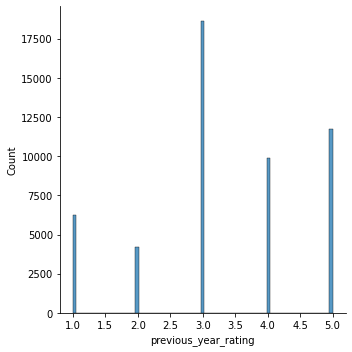

Average :  3.329255780917055
Standard deviation :  1.2599925519407267
Median :  3.0
Mode :  3


In [ ]:
# distribution of target variable 'previous_year_rating'

sns.displot(data=data, x='previous_year_rating')
#sns.displot(data=df_churning, x='age', hue='Attrition_Flag', kde=True)
average = df['previous_year_rating'].mean()
median = df['previous_year_rating'].median()
mode = df['previous_year_rating'].mode()
std = df['previous_year_rating'].std()

# plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
# plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
# plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()
print('Average : ', average)
print('Standard deviation : ', std)
print('Median : ', median)
print('Mode : ', int(mode))

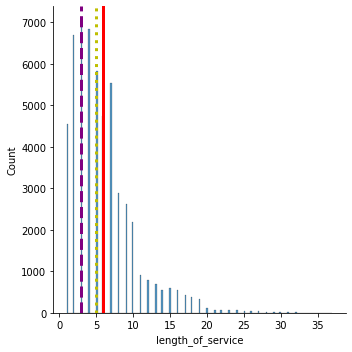

Average :  5.865512333965844
Standard deviation :  4.2650941796862725
Median :  5.0
Mode :  3


In [ ]:
# distribution of target variable 'length_of_service'

sns.displot(data=df, x='length_of_service')
#sns.displot(data=df_churning, x='age', hue='Attrition_Flag', kde=True)
average = df['length_of_service'].mean()
median = df['length_of_service'].median()
mode = df['length_of_service'].mode()
std = df['length_of_service'].std()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()
print('Average : ', average)
print('Standard deviation : ', std)
print('Median : ', median)
print('Mode : ', int(mode))

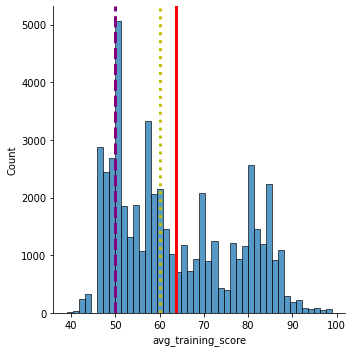

Average :  63.71223778900628
Standard deviation :  13.52190993368132
Median :  60.0
Mode :  50


In [ ]:
# distribution of target variable 'avg_training_score'

sns.displot(data=df, x='avg_training_score')
#sns.displot(data=df_churning, x='age', hue='Attrition_Flag', kde=True)
average = df['avg_training_score'].mean()
median = df['avg_training_score'].median()
mode = df['avg_training_score'].mode()
std = df['avg_training_score'].std()

plt.axvline(average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median, color='y', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode[0], color='purple', linestyle='dashed', linewidth=3, label='Mode')

plt.show()
print('Average : ', average)
print('Standard deviation : ', std)
print('Median : ', median)
print('Mode : ', int(mode))

## Correlation Between Variables 

In [ ]:
df['is_promoted']


0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

In [ ]:
data.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,0.008420,-0.000661
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.007628,0.044430
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.008169,-0.049500
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.027738,0.075474
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.039927,-0.039381
awards_won,0.008420,-0.007628,-0.008169,0.027738,-0.039927,1.000000,0.073963
avg_training_score,-0.000661,0.044430,-0.049500,0.075474,-0.039381,0.073963,1.000000


In [ ]:
## hanya mengambil feature dengan tipe numeric
df_corr = data[['no_of_trainings', 'age', 'length_of_service', 'avg_training_score', 'is_promoted']]
corr_result = df_corr.corr()
corr_result

,no_of_trainings,age,length_of_service,avg_training_score
no_of_trainings,1.000000,-0.081278,-0.057275,0.044430
age,-0.081278,1.000000,0.657111,-0.049500
length_of_service,-0.057275,0.657111,1.000000,-0.039381
avg_training_score,0.044430,-0.049500,-0.039381,1.000000


### Heatmap

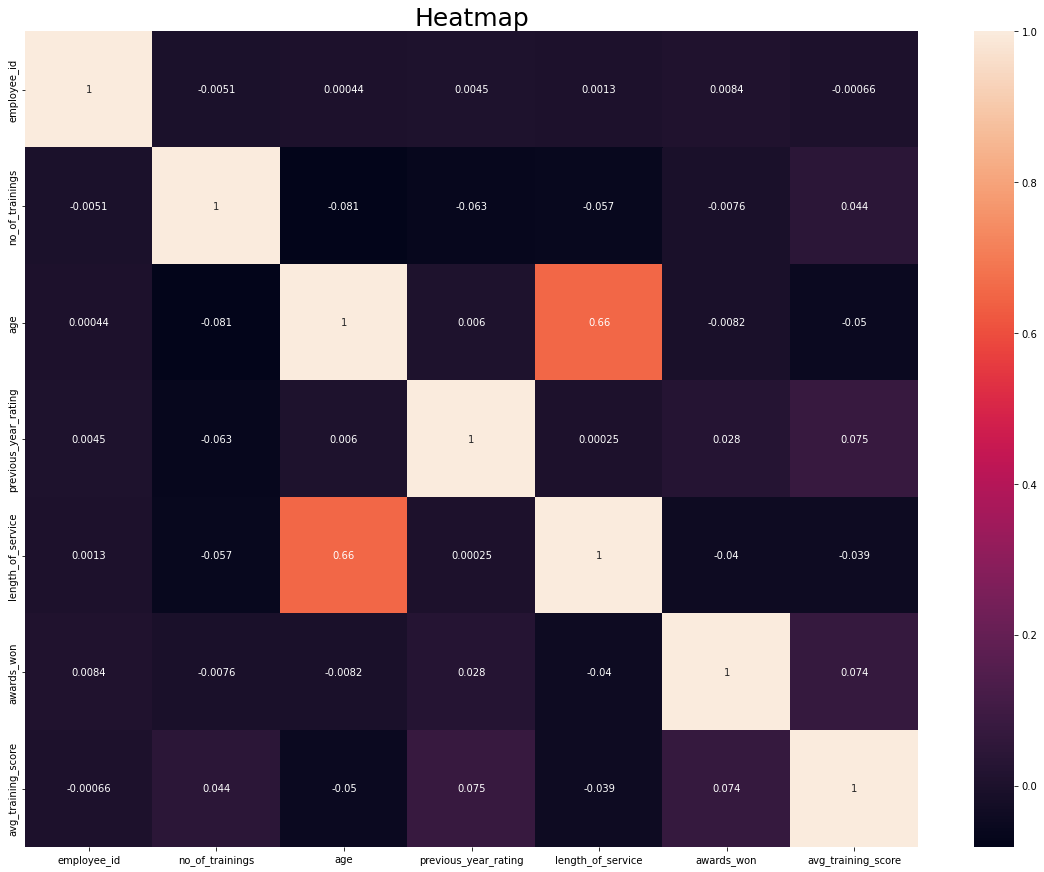

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, )
plt.title("Heatmap", fontsize = 25);
plt.show()

## Statistics Plot

In [ ]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,No
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,No
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,No
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,No
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,No


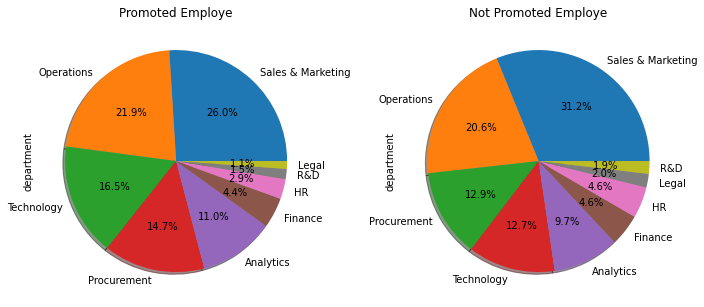

In [ ]:
f, axes = plt.subplots(1,2, figsize=(10, 6))
promoted_data['department'].value_counts().plot(kind='pie',ax=axes[0], title='Promoted Employe', autopct='%1.1f%%', shadow=True)
notpromoted_data['department'].value_counts().plot(kind='pie',ax=axes[1], title='Not Promoted Employe', autopct='%1.1f%%', shadow=True)

plt.tight_layout()
plt.show()

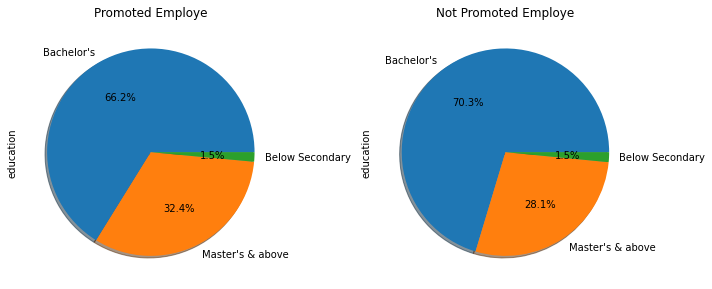

In [ ]:
f, axes = plt.subplots(1,2, figsize=(10, 6))
promoted_data['education'].value_counts().plot(kind='pie',ax=axes[0], title='Promoted Employe', autopct='%1.1f%%', shadow=True)
notpromoted_data['education'].value_counts().plot(kind='pie',ax=axes[1], title='Not Promoted Employe', autopct='%1.1f%%', shadow=True)

plt.tight_layout()
plt.show()

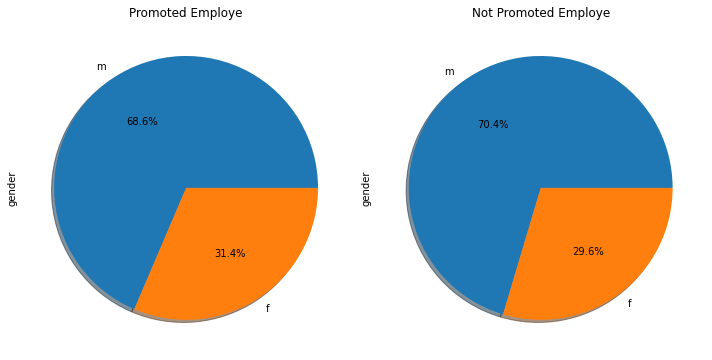

In [ ]:
f, axes = plt.subplots(1,2, figsize=(10, 6))
promoted_data['gender'].value_counts().plot(kind='pie',ax=axes[0], title='Promoted Employe', autopct='%1.1f%%', shadow=True)
notpromoted_data['gender'].value_counts().plot(kind='pie',ax=axes[1], title='Not Promoted Employe', autopct='%1.1f%%', shadow=True)

plt.tight_layout()
plt.show()

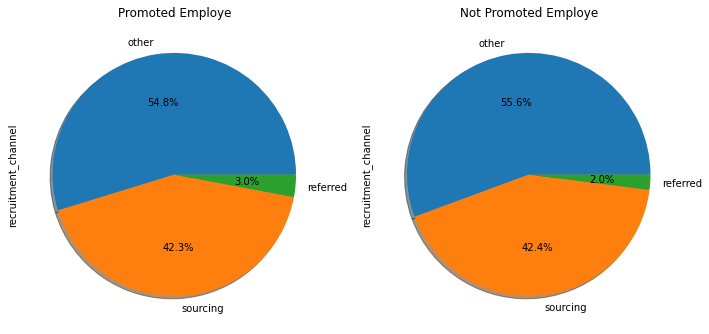

In [ ]:
f, axes = plt.subplots(1,2, figsize=(10, 6))
promoted_data['recruitment_channel'].value_counts().plot(kind='pie',ax=axes[0], title='Promoted Employe', autopct='%1.1f%%', shadow=True)
notpromoted_data['recruitment_channel'].value_counts().plot(kind='pie',ax=axes[1], title='Not Promoted Employe', autopct='%1.1f%%', shadow=True)

plt.tight_layout()
plt.show()

#DATA PREPOCESSING

##Data Cleansing

###1. Drop Duplicates 

In [ ]:
df.drop_duplicates() # Tidak ada data duplicate

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0


###2. Handling Missing Values 

In [ ]:
# Number of cases with NaN
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
awards_won,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,52248.0,63.712238,13.521910,39.0,51.00,60.0,77.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


### Data Imputation

#### avg_trainning_score

In [ ]:
# Missing Values (avg_training_score)
df.loc[df['avg_training_score'].isnull(), 'avg_training_score'] = df['avg_training_score'].median()

#### education

In [ ]:
# Missing Values (education)
df_education = df['education']
df_education.isnull().sum()

2409

In [ ]:
df_education = df_education.fillna(df_education.mode()[0])

In [ ]:
df['education'] = df_education.values

#### previous_year_rating

In [ ]:
# Missing Values (previous_year_rating)
df_year_rating = df['previous_year_rating']
df_year_rating.isnull().sum()

4124

In [ ]:
df_year_rating = df_year_rating.fillna(df_year_rating.mode()[0])
df_year_rating.isnull().sum()

0

In [ ]:
df['previous_year_rating'] = df_year_rating.values

### Other Preparation

#### Mendefinisikan Variabel Dependen dan Independent

In [ ]:
# Dependent Variable
y = df['is_promoted']
y_no = y[y==0]
y_yes = y[y==1]

# Independent Variable
x_no = df[df['is_promoted']==0].drop(['employee_id', 'is_promoted'], axis = 1)
x_yes = df[df['is_promoted']==1].drop(['employee_id', 'is_promoted'], axis = 1)


In [ ]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,60.0,0


#### Delete Columns Unique Value

In [ ]:
df = df.drop(['employee_id'], axis = 1)
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


## Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['region'] = label.fit_transform(df['region'])

In [ ]:
df['department'] = label.fit_transform(df['department'])

In [ ]:
df['education'] = label.fit_transform(df['education'])

In [ ]:
df['gender'] = label.fit_transform(df['gender'])

In [ ]:
df['recruitment_channel'] = label.fit_transform(df['recruitment_channel'])

In [ ]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,0,49.0,0
1,4,14,0,1,0,1,30,5.0,4,0,60.0,0
2,7,10,0,1,2,1,34,3.0,7,0,50.0,0
3,7,15,0,1,0,2,39,1.0,10,0,50.0,0
4,8,18,0,1,0,1,45,3.0,2,0,73.0,0


## Feature Selection 

### Numerical Feature

#### Using ANOVA Testing

In [ ]:
X_num = df[['no_of_trainings', 'age', 'length_of_service', 'avg_training_score']]

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif

In [ ]:
MIC_anova = SelectKBest(score_func=f_classif, k='all')

In [ ]:
MIC_anova.fit(X_num, y)

SelectKBest(k='all')

In [ ]:
feature_MI_pvalue = pd.Series(MIC_anova.pvalues_, index = X_num.columns)
feature_MI_pvalue.round(4).sort_values(ascending = False)

length_of_service     0.0125
age                   0.0001
avg_training_score    0.0000
no_of_trainings       0.0000
dtype: float64

Berdasarkan p-value yang diperoleh dari pengujian ANOVA di atas, maka dapat disimpulkan bahwa semua variabel numerik yang akan digunakan ternyata mempunyai pengaruh yang signifikan terhadap dipromosikan/tidaknya karyawan.

### Categorical Feature

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot


In [ ]:
# df Kategorik
X_cat = df[['department', 'region', 'education','gender','recruitment_channel','previous_year_rating','awards_won' ]].astype("category")

In [ ]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   department            54808 non-null  category
 1   region                54808 non-null  category
 2   education             54808 non-null  category
 3   gender                54808 non-null  category
 4   recruitment_channel   54808 non-null  category
 5   previous_year_rating  54808 non-null  category
 6   awards_won            54808 non-null  category
dtypes: category(7)
memory usage: 377.3 KB


#### Using Chi-Squared Test

In [ ]:
chi_scores = chi2(X_cat, y)
chi_scores

(array([1.17185904e-03, 2.13326122e+01, 6.63563252e+01, 2.01311313e+00,
        3.01599472e-01, 5.74656810e+02, 2.05400931e+03]),
 array([9.72691809e-001, 3.86106847e-006, 3.76349265e-016, 1.55945032e-001,
        5.82881429e-001, 5.44932210e-127, 0.00000000e+000]))

In [ ]:
nilai_chi = pd.Series(chi_scores[0], index = X_cat.columns)
nilai_chi

department                 0.001172
region                    21.332612
education                 66.356325
gender                     2.013113
recruitment_channel        0.301599
previous_year_rating     574.656810
awards_won              2054.009313
dtype: float64

In [ ]:
p_value = pd.Series(chi_scores[1], index = X_cat.columns)
p_value.round(4)

department              0.9727
region                  0.0000
education               0.0000
gender                  0.1559
recruitment_channel     0.5829
previous_year_rating    0.0000
awards_won              0.0000
dtype: float64

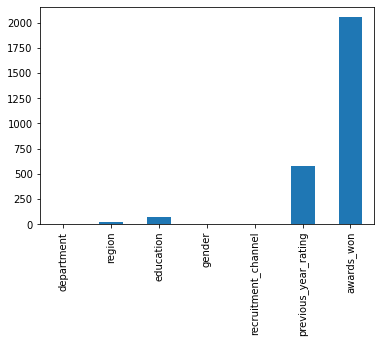

In [ ]:
nilai_chi.plot.bar()

Berdasarkan nilai chi-squared serta p-value yang dihasilkan, dapat diambil kesimpulan bahwa dari 7 variabel kategori yang diuji signifikansi terhadap variabel target, diperoleh ternyata berdasarkan uji chi-squared hanya ada 4 variabel yang signifikan berpengaruh terhadap dipromosikan/tidaknya karyawan tersebut. 

variabel tersebut di antaranya region, education, previous_year_rating dan awards_won

#### Using Mutual Information 

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [ ]:
MIC = SelectKBest(score_func=mutual_info_classif, k='all')

In [ ]:
MIC.fit(X_cat, y)

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x7fce9f0d1290>)

In [ ]:
feature_MI_scores = pd.Series(MIC.scores_, index = X_cat.columns)
feature_MI_scores.sort_values(ascending = False)

previous_year_rating    0.015653
awards_won              0.010431
gender                  0.005570
region                  0.004314
education               0.004142
recruitment_channel     0.003085
department              0.002970
dtype: float64

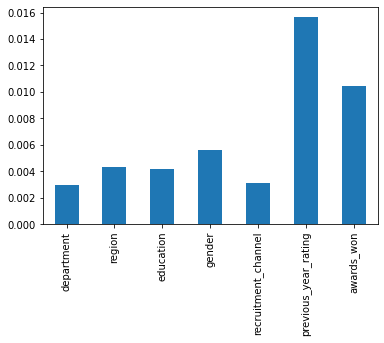

In [ ]:
feature_MI_scores.plot.bar()

Namun, jika mengacu pada hasil mutual information kita memperoleh hasil yang sedikit berbeda. Dengan mengambil 4 skor mutual information yang tertinggi, maka kita akan memperoleh feature yang paling berpengaruh signifikan terhadap dipromosikan/tidaknya karyawan adalah :
previous_year_rating, awards_won, region, dan gender

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['is_promoted', 'department', 'gender', 'recruitment_channel'  ], axis=1)
y = df['is_promoted']

## Imbalanced

In [ ]:
# Handling imbalance df
from imblearn.over_sampling import SMOTE

oversampling = SMOTE(random_state=43, sampling_strategy=1)

In [ ]:
# Fit the over sampling
X, y = oversampling.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 12)

## Scaling

In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [ ]:
X_train.head()

,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
57812,6,0,1,40,4.284513,11,0,76.146461
44691,14,2,1,36,3.000000,2,0,51.000000
11471,7,0,1,36,3.000000,5,0,69.000000
97301,14,0,1,28,4.685816,2,0,53.685816
77860,6,0,1,36,3.868649,7,0,54.434324


In [ ]:
X_train_scaled.head()

,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
0,-1.081194,-0.634616,-0.334849,0.755658,0.608228,1.308638,-0.155288,0.630487
1,-0.165858,1.695106,-0.334849,0.211501,-0.526452,-0.886734,-0.155288,-1.115866
2,-0.966777,-0.634616,-0.334849,0.211501,-0.526452,-0.154944,-0.155288,0.134185
3,-0.165858,-0.634616,-0.334849,-0.876812,0.962721,-0.886734,-0.155288,-0.929343
4,-1.081194,-0.634616,-0.334849,0.211501,0.240873,0.332917,-0.155288,-0.877361


# Classification Model

## Import Library

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# evaluation metrics
def classification_eval (aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    
    accuracy = round((tp+tn) / (tp+tn+fp+fn) * 100, 2)
    precision = round((tp) / (tp+fp) * 100, 2)
    recall = round((tp) / (tp+fn) * 100, 2)
    
    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')

## KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

In [ ]:
classification_eval(y_train, y_train_pred, 'KNN Training')

Evaluation Model: KNN Training
[[33512  6594]
 [ 2605 37513]]
Accuracy   : 88.53 %
Precision  : 85.05 %
Recall     : 93.51 %


In [ ]:
classification_eval(y_test, y_test_pred, 'KNN Testing')

Evaluation Model: KNN Testing
[[7868 2166]
 [ 984 9038]]
Accuracy   : 84.29 %
Precision  : 80.67 %
Recall     : 90.18 %


## Decision Tree

In [ ]:
dectree = DecisionTreeClassifier(max_depth=15) # bisa cek pake gini atau pake entropy
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15)

In [ ]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

In [ ]:
pd.DataFrame(y_test_pred, columns=['is_promoted'])

,is_promoted
0,1
1,1
2,1
3,0
4,0
...,...
20051,0
20052,0
20053,0
20054,0


In [ ]:
classification_eval(y_train, y_train_pred, 'Decision Tree Training')

Evaluation Model: Decision Tree Training
[[36927  3179]
 [ 6810 33308]]
Accuracy   : 87.55 %
Precision  : 91.29 %
Recall     : 83.03 %


In [ ]:
classification_eval(y_test, y_test_pred, 'Decision Tree Testing')

Evaluation Model: Decision Tree Testing
[[8998 1036]
 [1930 8092]]
Accuracy   : 85.21 %
Precision  : 88.65 %
Recall     : 80.74 %


## Random Forest

In [ ]:
ranfor = RandomForestClassifier(max_depth=15)
ranfor.fit(X_train, y_train)

RandomForestClassifier(max_depth=15)

In [ ]:
y_train_pred = ranfor.predict(X_train)
y_test_pred = ranfor.predict(X_test)

In [ ]:
classification_eval(y_train, y_train_pred, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[37305  2801]
 [ 6387 33731]]
Accuracy   : 88.55 %
Precision  : 92.33 %
Recall     : 84.08 %


In [ ]:
classification_eval(y_test, y_test_pred, 'Random Forest testing')

Evaluation Model: Random Forest testing
[[9190  844]
 [1848 8174]]
Accuracy   : 86.58 %
Precision  : 90.64 %
Recall     : 81.56 %


## Classification Report

In [ ]:
target_names = ['No Promoted', 'Promoted']
report_train = classification_report(y_train, y_train_pred, target_names=target_names)
print(report_train)

              precision    recall  f1-score   support

 No Promoted       0.85      0.93      0.89     40106
    Promoted       0.92      0.84      0.88     40118

    accuracy                           0.89     80224
   macro avg       0.89      0.89      0.89     80224
weighted avg       0.89      0.89      0.89     80224



In [ ]:
target_names = ['No Promoted', 'Promoted']
report_test = classification_report(y_test, y_test_pred, target_names=target_names)
print(report_test)

              precision    recall  f1-score   support

 No Promoted       0.83      0.92      0.87     10034
    Promoted       0.91      0.82      0.86     10022

    accuracy                           0.87     20056
   macro avg       0.87      0.87      0.87     20056
weighted avg       0.87      0.87      0.87     20056



# Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

### KNN

{'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'distance'}
KNeighborsClassifier(algorithm='brute', weights='distance')
Accuracy :  0.8707120063821301
Precision :  0.8323937360178971
Recall/ sensitivity :  0.9281580522849731
F1 :  0.8776713685898949
Specificity :  0.8133346621486944
Confusion matrix :
[[8161 1873]
 [ 720 9302]]
Plot Confusion Matrix :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


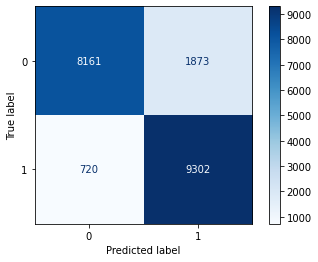

PERFORMANCE TRAINING
Accuracy :  0.9948020542481053
Precision :  0.9955068520506228
Recall/ sensitivity :  0.9940924273393489
F1 :  0.9947991369311167
Specificity :  0.995511893482272
Support :  None
Confusion matrix :
[[39926   180]
 [  237 39881]]
Plot Confusion Matrix :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


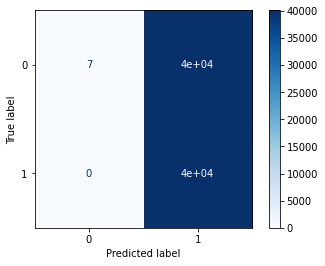

PERFORMANCE TESTING
Accuracy :  0.8657758276824891
Precision :  0.9064094034153914
Recall/ sensitivity :  0.8156056675314308
F1 :  0.8586134453781512
Specificity :  0.9158859876420171
Support :  None
Confusion matrix :
[[9190  844]
 [1848 8174]]
Plot Confusion Matrix :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


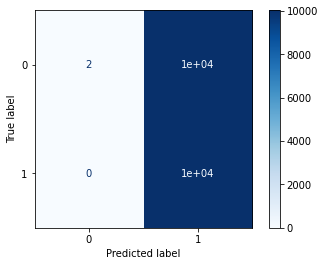

In [ ]:
KNN = KNeighborsClassifier()

grid_values = {'n_neighbors': [3, 5, 7, 9, 11],  'weights' : ['uniform', 'distance'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_KNN = GridSearchCV(KNN, param_grid = grid_values, scoring = 'recall', cv=10)
grid_KNN.fit(X_train_scaled, y_train)

#Predict values based on new parameters
y_train_pred = grid_KNN.predict(X_train_scaled)
y_pred = grid_KNN.predict(X_test_scaled)


#best hyperparameters
print(grid_KNN.best_params_)
print(grid_KNN.best_estimator_)

# Model Performance 
print('Accuracy : ',accuracy_score(y_test, y_pred))    
print('Precision : ',precision_score(y_test, y_pred, average='binary'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_pred, average='binary')) 
print('F1 : ',f1_score(y_test, y_pred, average='binary')) 
sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='binary')
print('Specificity : ',spec)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(grid_KNN, X_test_scaled, y_test, cmap=plt.cm.Blues)  
plt.show()

# Model Performance Training
print('PERFORMANCE TRAINING')
print('Accuracy : ',accuracy_score(y_train, y_train_pred))    
print('Precision : ',precision_score(y_train, y_train_pred, average='binary'))  
print('Recall/ sensitivity : ',recall_score(y_train, y_train_pred, average='binary')) 
print('F1 : ',f1_score(y_train, y_train_pred, average='binary')) 
sens, spec, sup = sensitivity_specificity_support(y_train, y_train_pred, average='binary')
print('Specificity : ',spec)
print('Support : ', sup)
print('Confusion matrix :')
print(confusion_matrix(y_train, y_train_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(grid_KNN, X_train, y_train, cmap=plt.cm.Blues) 
plt.show()

# Model Performance Testing
print('PERFORMANCE TESTING')
print('Accuracy : ',accuracy_score(y_test, y_test_pred))    
print('Precision : ',precision_score(y_test, y_test_pred, average='binary'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_test_pred, average='binary')) 
print('F1 : ',f1_score(y_test, y_test_pred, average='binary')) 
sens, spec, sup = sensitivity_specificity_support(y_test,y_test_pred, average='binary')
print('Specificity : ',spec)
print('Support : ', sup)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_test_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(grid_KNN, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

 


### Decision Tree

{'criterion': 'gini', 'max_depth': 11}
DecisionTreeClassifier(max_depth=11, random_state=12)
PERFORMANCE TRAINING
Accuracy :  0.8349870362983646
Precision :  0.8847034577513166
Recall/ sensitivity :  0.770427239643053
F1 :  0.8236203266981108
Specificity :  0.8995661497032863
Support :  None
Confusion matrix :
[[36078  4028]
 [ 9210 30908]]
Plot Confusion Matrix :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


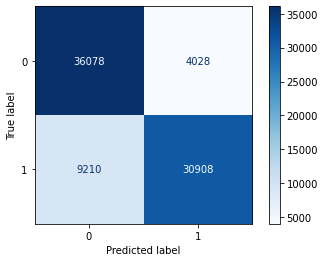

PERFORMANCE TESTING
Accuracy :  0.8281810929397686
Precision :  0.8781048758049678
Recall/ sensitivity :  0.7619237677110358
F1 :  0.8158991345229191
Specificity :  0.8943591787921068
Support :  None
Confusion matrix :
[[8974 1060]
 [2386 7636]]
Plot Confusion Matrix :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


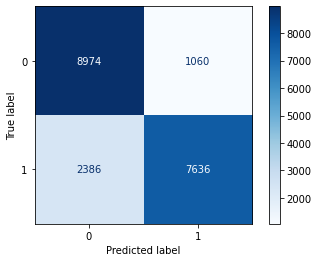

In [ ]:
dt = DecisionTreeClassifier(random_state=12)

grid_values = {'max_depth': [3, 5, 7, 9, 11],'criterion':['gini', 'entropy' ]}
grid_dt = GridSearchCV(dt, param_grid = grid_values,scoring = 'recall', cv=10)
grid_dt.fit(X_train, y_train)

#Predict values based on new parameters
y_train_pred = grid_dt.predict(X_train)
y_test_pred = grid_dt.predict(X_test)

#best hyperparameters
print(grid_dt.best_params_)
print(grid_dt.best_estimator_)

# Model Performance Training
print('PERFORMANCE TRAINING')
print('Accuracy : ',accuracy_score(y_train, y_train_pred))    
print('Precision : ',precision_score(y_train, y_train_pred, average='binary'))  
print('Recall/ sensitivity : ',recall_score(y_train, y_train_pred, average='binary')) 
print('F1 : ',f1_score(y_train, y_train_pred, average='binary')) 
sens, spec, sup = sensitivity_specificity_support(y_train, y_train_pred, average='binary')
print('Specificity : ',spec)
print('Support : ', sup)
print('Confusion matrix :')
print(confusion_matrix(y_train, y_train_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(grid_dt, X_train, y_train, cmap=plt.cm.Blues)  
plt.show()

# Model Performance Testing
print('PERFORMANCE TESTING')
print('Accuracy : ',accuracy_score(y_test, y_test_pred))    
print('Precision : ',precision_score(y_test, y_test_pred, average='binary'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_test_pred, average='binary')) 
print('F1 : ',f1_score(y_test, y_test_pred, average='binary')) 
sens, spec, sup = sensitivity_specificity_support(y_test,y_test_pred, average='binary')
print('Specificity : ',spec)
print('Support : ', sup)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_test_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(grid_dt, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()



### Random Forest

{'criterion': 'gini', 'max_depth': 11}
RandomForestClassifier(max_depth=11, random_state=12)
PERFORMANCE TRAINING
Accuracy :  0.8441613482249701
Precision :  0.8829385989239559
Recall/ sensitivity :  0.7935839274141283
F1 :  0.8358800672127704
Specificity :  0.8947539021592779
Support :  None
Confusion matrix :
[[35885  4221]
 [ 8281 31837]]
Plot Confusion Matrix :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


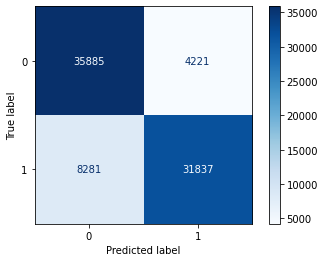

PERFORMANCE TESTING
Accuracy :  0.8352612684483446
Precision :  0.8735542704626335
Recall/ sensitivity :  0.7837756934743564
F1 :  0.8262333017776375
Specificity :  0.8866852700817222
Support :  None
Confusion matrix :
[[8897 1137]
 [2167 7855]]
Plot Confusion Matrix :


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


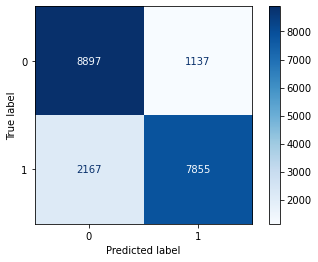

In [ ]:
ranfor = RandomForestClassifier(random_state=12)

grid_values = {'max_depth': [3, 5, 7, 9, 11],'criterion':['gini', 'entropy' ]}
grid_ranfor = GridSearchCV(ranfor, param_grid = grid_values, scoring = 'recall', cv=10)
grid_ranfor.fit(X_train, y_train)

#Predict values based on new parameters
y_train_pred = grid_ranfor.predict(X_train)
y_test_pred = grid_ranfor.predict(X_test)

#best hyperparameters
print(grid_ranfor.best_params_)
print(grid_ranfor.best_estimator_)

# Model Performance Training
print('PERFORMANCE TRAINING')
print('Accuracy : ',accuracy_score(y_train, y_train_pred))    
print('Precision : ',precision_score(y_train, y_train_pred, average='binary'))  
print('Recall/ sensitivity : ',recall_score(y_train, y_train_pred, average='binary')) 
print('F1 : ',f1_score(y_train, y_train_pred, average='binary')) 
sens, spec, sup = sensitivity_specificity_support(y_train, y_train_pred, average='binary')
print('Specificity : ',spec)
print('Support : ', sup)
print('Confusion matrix :')
print(confusion_matrix(y_train, y_train_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(grid_ranfor, X_train, y_train, cmap=plt.cm.Blues)  
plt.show()


# Model Performance Testing
print('PERFORMANCE TESTING')
print('Accuracy : ',accuracy_score(y_test, y_test_pred))    
print('Precision : ',precision_score(y_test, y_test_pred, average='binary'))  
print('Recall/ sensitivity : ',recall_score(y_test, y_test_pred, average='binary')) 
print('F1 : ',f1_score(y_test, y_test_pred, average='binary')) 
sens, spec, sup = sensitivity_specificity_support(y_test,y_test_pred, average='binary')
print('Specificity : ',spec)
print('Support : ', sup)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_test_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(grid_ranfor, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()



# Pemutation Importance/Feature Importance 

## KNN

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
X_name = X_train.columns

In [ ]:
pi_KNN = permutation_importance(knn, X_test, y_test, n_repeats = 5, random_state = 12)
pi_KNN = pi_KNN.importances_mean
pi_KNN

array([-4.28799362e-04,  1.89469485e-04, -2.99162345e-05,  1.89469485e-04,
        3.39050658e-04, -4.78659753e-04,  0.00000000e+00,  1.39609095e-03])

In [ ]:
PI_KNN = np.array(X_train.columns)
PI_KNN = pd.DataFrame(X_name, columns =['Variable'])
PI_KNN

,Variable
0,region
1,education
2,no_of_trainings
3,age
4,previous_year_rating
5,length_of_service
6,awards_won
7,avg_training_score


In [ ]:
PI_KNN['Permutation_importance'] = pi_KNN
PI_KNN


,Variable,Permutation_importance
0,region,-0.000429
1,education,0.000189
2,no_of_trainings,-0.000030
3,age,0.000189
4,previous_year_rating,0.000339
5,length_of_service,-0.000479
6,awards_won,0.000000
7,avg_training_score,0.001396


In [ ]:
PI_KNN.sort_values('Permutation_importance', axis = 0, ascending = False, inplace = True)

In [ ]:
PI_KNN

,Variable,Permutation_importance
7,avg_training_score,0.001396
4,previous_year_rating,0.000339
3,age,0.000189
1,education,0.000189
6,awards_won,0.000000
2,no_of_trainings,-0.000030
0,region,-0.000429
5,length_of_service,-0.000479


## Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=12)
dt.fit(X_train, y_train)
fi_dt = dt.feature_importances_
fi_dt

array([0.09341557, 0.02133706, 0.01919305, 0.11139974, 0.40457269,
       0.07625051, 0.00598014, 0.26785123])

In [ ]:
FI_dt = np.array(X_train.columns)
FI_dt = pd.DataFrame(X_name, columns =['Variable'])
FI_dt

,Variable
0,region
1,education
2,no_of_trainings
3,age
4,previous_year_rating
5,length_of_service
6,awards_won
7,avg_training_score


In [ ]:
FI_dt['Feature_importance'] = fi_dt
FI_dt


,Variable,Feature_importance
0,region,0.093416
1,education,0.021337
2,no_of_trainings,0.019193
3,age,0.111400
4,previous_year_rating,0.404573
5,length_of_service,0.076251
6,awards_won,0.005980
7,avg_training_score,0.267851


In [ ]:
FI_dt.sort_values('Feature_importance', axis = 0, ascending = False, inplace = True)

In [ ]:
FI_dt

,Variable,Feature_importance
4,previous_year_rating,0.404573
7,avg_training_score,0.267851
3,age,0.111400
0,region,0.093416
5,length_of_service,0.076251
1,education,0.021337
2,no_of_trainings,0.019193
6,awards_won,0.005980


## Random Forest

In [ ]:
ranfor.fit(X_train, y_train)
fi_ranfor = ranfor.feature_importances_
fi_ranfor

array([0.11570599, 0.0296969 , 0.03001187, 0.1149808 , 0.32747608,
       0.07940175, 0.00449013, 0.29823647])

In [ ]:
FI_ranfor = np.array(X_train.columns)
FI_ranfor = pd.DataFrame(X_name, columns =['Variable'])
FI_ranfor

,Variable
0,region
1,education
2,no_of_trainings
3,age
4,previous_year_rating
5,length_of_service
6,awards_won
7,avg_training_score


In [ ]:
FI_ranfor['Feature_importance'] = fi_ranfor
FI_ranfor


,Variable,Feature_importance
0,region,0.115706
1,education,0.029697
2,no_of_trainings,0.030012
3,age,0.114981
4,previous_year_rating,0.327476
5,length_of_service,0.079402
6,awards_won,0.004490
7,avg_training_score,0.298236


In [ ]:
FI_ranfor.sort_values('Feature_importance', axis = 0, ascending = False, inplace = True)

In [ ]:
FI_ranfor

,Variable,Feature_importance
4,previous_year_rating,0.327476
7,avg_training_score,0.298236
0,region,0.115706
3,age,0.114981
5,length_of_service,0.079402
2,no_of_trainings,0.030012
1,education,0.029697
6,awards_won,0.004490
